EN2550 Assignment 01

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises/tree/master/Assignment_01

In [3]:
# imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

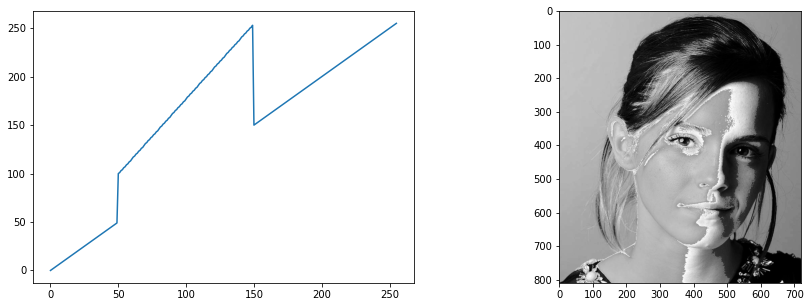

In [3]:
# 1

f=cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert f is not None

t=np.zeros(255-0+1).astype(np.uint8)
r1=np.linspace(0,50,(50+1-0)).astype(np.uint8)
r2=np.linspace(100,255,(150+1-50)).astype(np.uint8)
r3=np.linspace(150,255,(255+1-150)).astype(np.uint8)
t[0:50+1]=r1
t[50:150+1]=r2
t[150:255+1]=r3

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(t)
ax[1].imshow(g,cmap='gray', vmin=0, vmax=255)


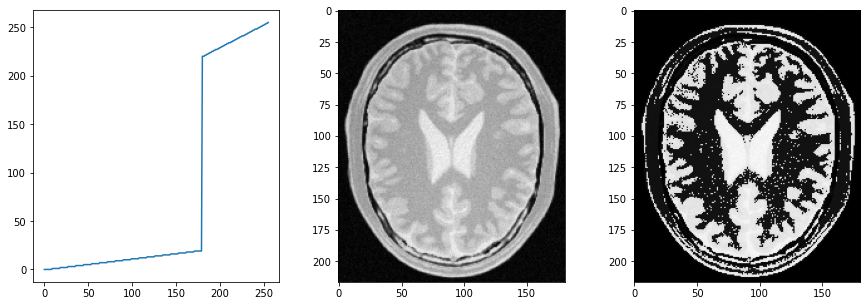

In [7]:
# 2 (a) white matter

f=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert f is not None

a=180
t=np.zeros(256).astype(np.uint8)

r1=np.linspace(0,20,(a+1)).astype(np.uint8)
r2=np.linspace(220,255,(255+1-a)).astype(np.uint8)
t[0:a+1]=r1
t[a:255+1]=r2

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].plot(t)
ax[1].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[2].imshow(g,cmap='gray', vmin=0, vmax=255)


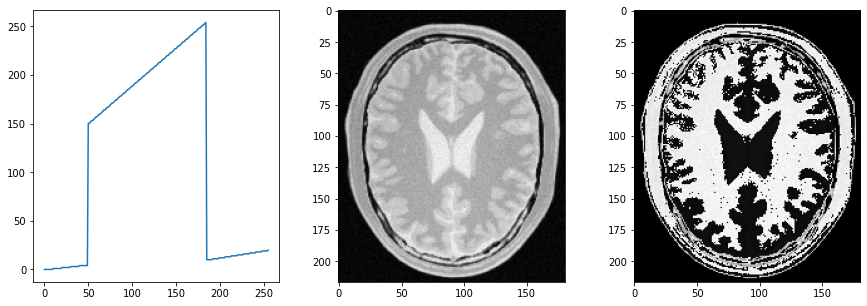

In [3]:
# 2 (b) gray matter

f=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert f is not None

a1,a2=50,185
t=np.zeros(256).astype(np.uint8)
r1=np.linspace(0,5,(a1+1-0)).astype(np.uint8)
r2=np.linspace(150,255,(a2+1-a1)).astype(np.uint8)
r3=np.linspace(10,20,(255+1-a2)).astype(np.uint8)
t[0:a1+1]=r1
t[a1:a2+1]=r2
t[a2:255+1]=r3

g=cv.LUT(f,t)

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(t)
ax[1].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[2].imshow(g,cmap='gray', vmin=0, vmax=255)

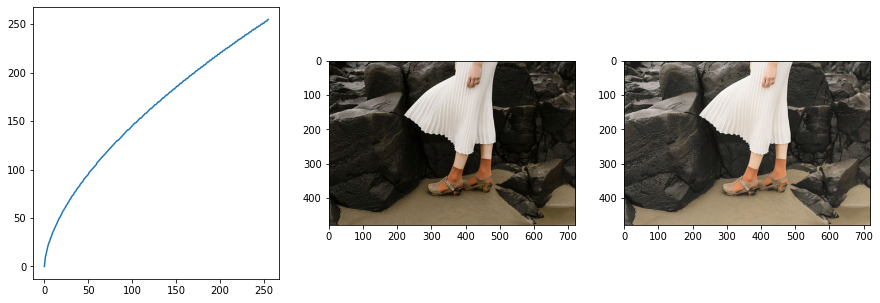

In [24]:
# 3 (a)

f=cv.imread('highlights_and_shadows.jpg')
assert f is not None

lab_org=cv.cvtColor(f,cv.COLOR_BGR2Lab)
gamma=0.6
t=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)

lab_t=np.copy(lab_org)
lab_t[:,:,0]=t[lab_t[:,:,0]]
rgb_org=cv.cvtColor(lab_org,cv.COLOR_Lab2RGB)
rgb_t=cv.cvtColor(lab_t,cv.COLOR_Lab2RGB)
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(t)
ax[1].imshow(rgb_org)
ax[2].imshow(rgb_t)

Text(0.5, 1.0, 'Corrected - L pane')

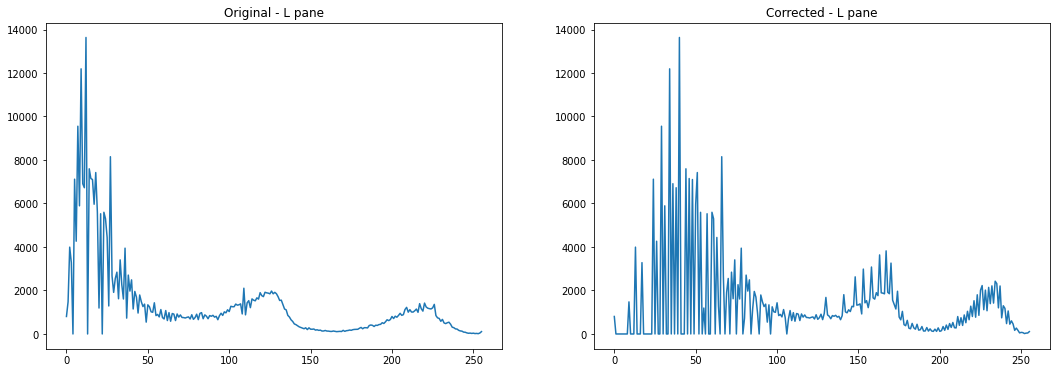

In [27]:
# 3 (b)

hist_org=cv.calcHist([lab_org],[0],None,[256],[0,256])
hist_t=cv.calcHist([lab_t],[0],None,[256],[0,256])
fig,ax=plt.subplots(1,2,figsize=(18,6))
ax[0].plot(hist_org)
ax[0].set_title("Original - L pane")
ax[1].plot(hist_t)
ax[1].set_title("Corrected - L pane")

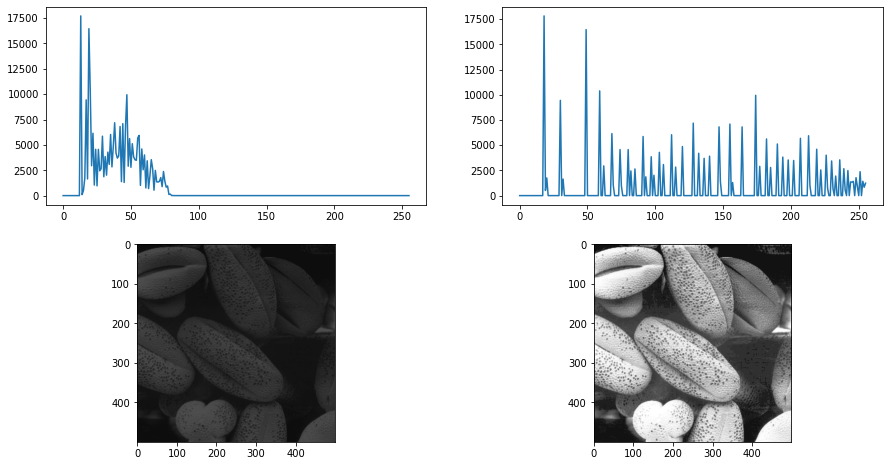

In [8]:
# 4

f=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None


hist_org=cv.calcHist([f],[0],None,[256],[0,256])
cumsum=hist_org.cumsum()
t=np.round(cumsum*255/f.size).astype(np.uint8)
g=t[f]
hist_eq=cv.calcHist([g],[0],None,[256],[0,256])

fig,ax=plt.subplots(2,2,figsize=(15,8))
ax[0][0].plot(hist_org)
ax[0][1].plot(hist_eq)
ax[1][0].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[1][1].imshow(g,cmap='gray', vmin=0, vmax=255)

plt.show()

im01.png: noramalized sum of squared difference = 0.022723643109202385


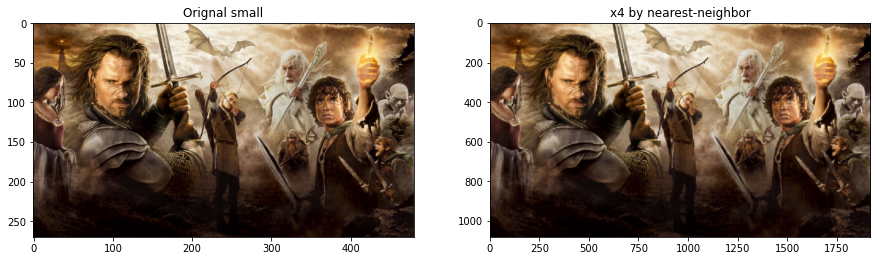

im02.png: noramalized sum of squared difference = 0.010222389362752438


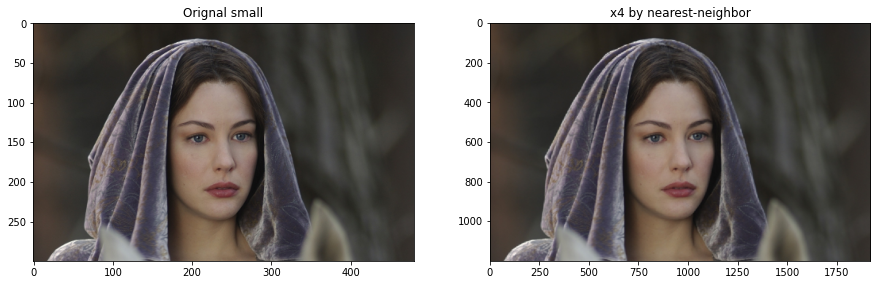

im03.png: noramalized sum of squared difference = 0.014736237935721874


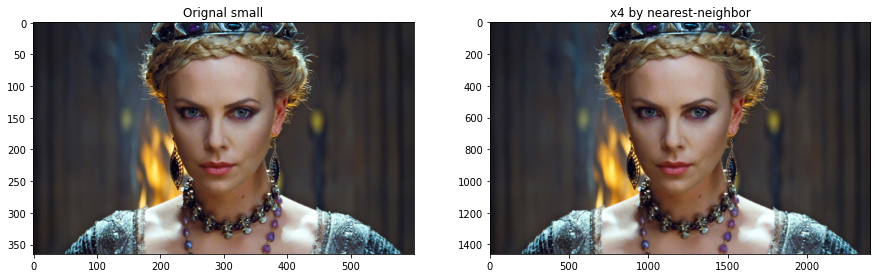

In [45]:
# 5 (a)

def zoomNearestNeighbor(im,scale):

    rows=int(scale*im.shape[0])
    cols=int(scale*im.shape[1])
    chnls=im.shape[2]
    
    zoomed=np.zeros((rows,cols,chnls),dtype=im.dtype)

    for i in range(rows):
        for j in range(cols):
            im_i=round(i/scale)
            im_j=round(j/scale)
            if(im_i>=im.shape[0]): im_i=im.shape[0]-1
            if(im_j>=im.shape[1]): im_j=im.shape[1]-1
            zoomed[i,j]=im[im_i,im_j]

    return zoomed

for i in range(1,4):
    im=cv.imread('a1q5images\im0{}small.png'.format(i))
    zoomed=zoomNearestNeighbor(im,4)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
    ax[0].set_title("Orignal small")
    ax[1].imshow(cv.cvtColor(zoomed,cv.COLOR_BGR2RGB))
    ax[1].set_title("x4 by nearest-neighbor")   

    imlarge=cv.imread('a1q5images\im0{}.png'.format(i))
    nssd = cv.matchTemplate(imlarge,zoomed,cv.TM_SQDIFF_NORMED)
    print("im0{}.png: noramalized sum of squared difference = {}".format(i,nssd[0,0]))

    plt.show()


In [47]:
# 5 (b)

def zoomBilinearInterpolation(im,scale):

    rows=int(scale*im.shape[0])
    cols=int(scale*im.shape[1])
    chnls=im.shape[2]
    
    zoomed=np.zeros((rows,cols,chnls),dtype=im.dtype)

    for m in range(rows):
        for n in range(cols):
            for c in range(chnls):
                i,j=m/scale,n/scale
                i0,j0=int(i),int(j)
                i1,j1=i0+1,j0+1
                di0,dj0=i-i0,j-j0
                di1,dj1=1-di0,1-dj0

                k0=im[i0,j0]*di1+im[i1,j0]*di0
                k1=im[i0,j1]*di1+im[i1,j1]*di0
                k=k0*dj1+k1*dj0
                
                # if(im_i>=im.shape[0]): im_i=im.shape[0]-1
                # if(im_j>=im.shape[1]): im_j=im.shape[1]-1
                zoomed[m,n,c]=k

    return zoomed

for i in range(1,2):
    im=cv.imread('a1q5images\im0{}small.png'.format(i))
    zoomed=zoomBilinearInterpolation(im,4)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
    ax[0].set_title("Orignal small")
    ax[1].imshow(cv.cvtColor(zoomed,cv.COLOR_BGR2RGB))
    ax[1].set_title("x4 by bilinear-interpolation")   

    imlarge=cv.imread('a1q5images\im0{}.png'.format(i))
    nssd = cv.matchTemplate(imlarge,zoomed,cv.TM_SQDIFF_NORMED)
    print("im0{}.png: noramalized sum of squared difference = {}".format(i,nssd[0,0]))

    plt.show()


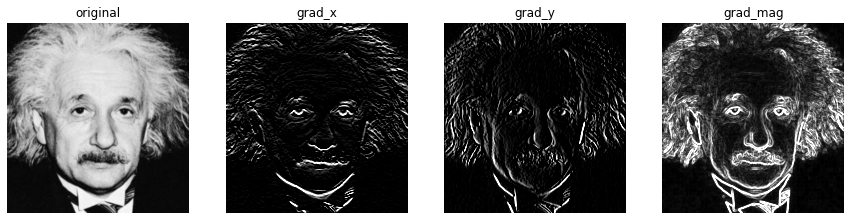

In [32]:
# 6 (a)

f=cv.imread('einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],
dtype=np.float32)

f_x=cv.filter2D(f,-1,sobel_v)

sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],
dtype=np.float32)

f_y=cv.filter2D(f,-1,sobel_h)

grad_mag=np.sqrt(f_x**2+f_y**2)

fig,ax=plt.subplots(1,4,figsize=(15,8))

ax[0].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[0].set_title('original')
ax[1].imshow(f_x,cmap='gray', vmin=0, vmax=255)
ax[1].set_title('grad_x')
ax[2].imshow(f_y,cmap='gray', vmin=0, vmax=255)
ax[2].set_title('grad_y')
ax[3].imshow(grad_mag,cmap='gray', vmin=0, vmax=255)
ax[3].set_title('grad_mag')

for axi in ax.ravel(): axi.axis('off')

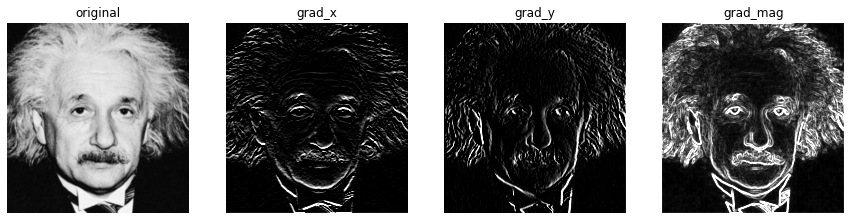

In [33]:
# 6 (b)

def convolve(img,kernal):
    kw=kernal.shape[0]
    kh=kernal.shape[1]
    kernal180=kernal[::-1,::-1]
    padded=np.pad(img,((kw//2,kw//2),(kh//2,kh//2)))
    res=np.zeros(img.shape).astype(np.float32)
    for m in range(img.shape[0]):
        for n in range(img.shape[1]):            
            res[m,n]=np.sum(padded[m:m+kw,n:n+kh]*kernal180)

    return res

f_x=convolve(f,sobel_v)
f_y=convolve(f,sobel_h)

grad_mag=np.sqrt(f_x**2+f_y**2)

fig,ax=plt.subplots(1,4,figsize=(15,8))

ax[0].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[0].set_title('original')
ax[1].imshow(f_x,cmap='gray', vmin=0, vmax=255)
ax[1].set_title('grad_x')
ax[2].imshow(f_y,cmap='gray', vmin=0, vmax=255)
ax[2].set_title('grad_y')
ax[3].imshow(grad_mag,cmap='gray', vmin=0, vmax=255)
ax[3].set_title('grad_mag')

for axi in ax.ravel(): axi.axis('off')

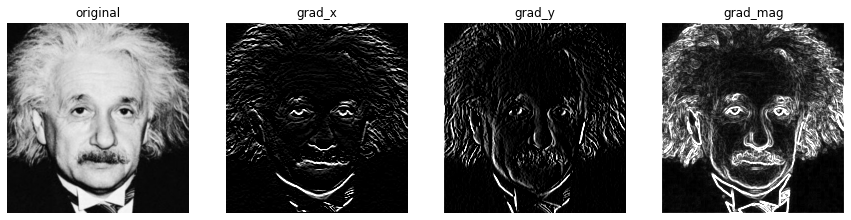

In [34]:
# 6 (c)

sobel_h1=np.array([[1],[2],[1]])
sobel_h2=np.array([[1,0,-1]])

sobel_v1=np.array([[1],[0],[-1]])
sobel_v2=np.array([[1,2,1]])


f_y=convolve(f,sobel_h1)
f_y=convolve(f_y,sobel_h2)

f_x=convolve(f,sobel_v1)
f_x=convolve(f_x,sobel_v2)


grad_mag=np.sqrt(f_x**2+f_y**2)

fig,ax=plt.subplots(1,4,figsize=(15,8))
ax[0].imshow(f,cmap='gray', vmin=0, vmax=255)
ax[0].set_title('original')
ax[1].imshow(f_x,cmap='gray', vmin=0, vmax=255)
ax[1].set_title('grad_x')
ax[2].imshow(f_y,cmap='gray', vmin=0, vmax=255)
ax[2].set_title('grad_y')
ax[3].imshow(grad_mag,cmap='gray', vmin=0, vmax=255)
ax[3].set_title('grad_mag')

for axi in ax.ravel(): axi.axis('off')


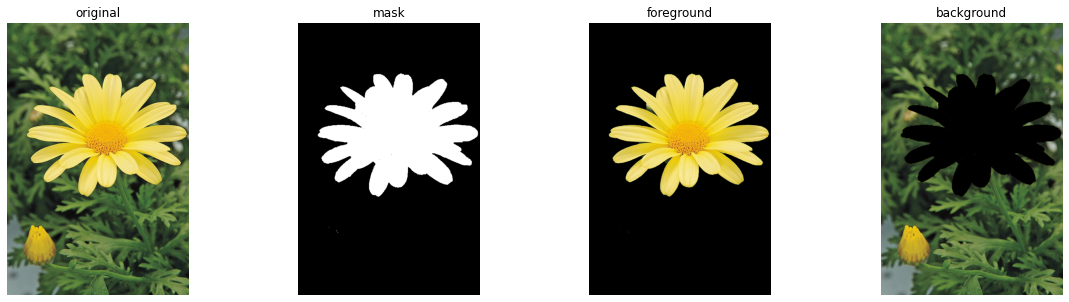

In [9]:
# 7 (a)

img=cv.imread('daisy.jpg')
assert img is not None

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (56,150,560,500)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv.GC_INIT_WITH_RECT)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

imgFg = img*mask[:,:,np.newaxis]
imgBg=img-imgFg

fig,ax=plt.subplots(1,4,figsize=(20,5))

ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].imshow(mask,cmap='gray', vmin=0, vmax=1)
ax[1].set_title('mask')
ax[2].imshow(cv.cvtColor(imgFg,cv.COLOR_BGR2RGB))
ax[2].set_title('foreground')
ax[3].imshow(cv.cvtColor(imgBg,cv.COLOR_BGR2RGB))
ax[3].set_title('background')

for axi in ax.ravel(): axi.axis('off')


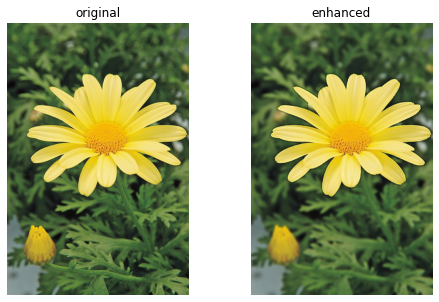

In [30]:
# 7 (b)

imgBgBlur=cv.GaussianBlur(imgBg,(9,9),12)
imgEnhnsd=np.bitwise_or(imgFg,imgBgBlur)
fig,ax=plt.subplots(1,2,figsize=(8,5))

ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title('original')
ax[1].imshow(cv.cvtColor(imgEnhnsd,cv.COLOR_BGR2RGB))
ax[1].set_title('enhanced')

for axi in ax.ravel(): axi.axis('off')

# 7 (c)

When we blur the backgound image, forground area of backgound image is exist as balck. So in the blured image pixels near edge become more dark due to convolve with that black area when bluring. So edge of the flower quite dark in the enhanced image.